In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/AI&ML/FruitinAmazon"

In [ ]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from PIL import Image

Data Understanding and Visualizations.

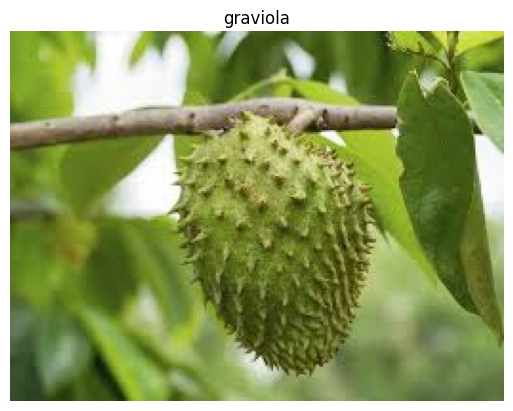

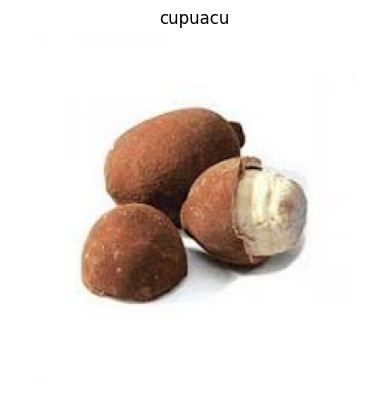

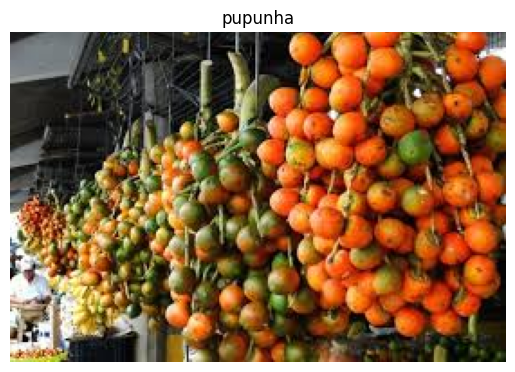

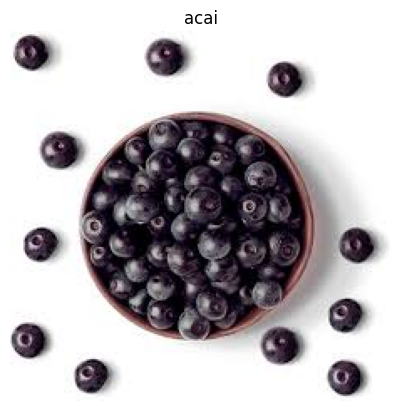

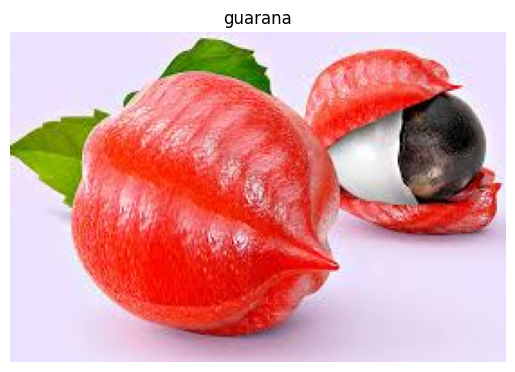

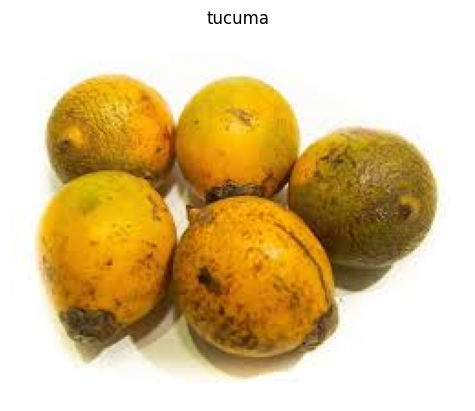

In [ ]:

# Directory containing training images
train_dir = '/content/drive/MyDrive/AI&ML/FruitinAmazon/train'

# Get list of subdirectories (each representing a class)
classes = os.listdir(train_dir)

# Display one image from each class
for class_name in classes:
    # Get list of image files in current class directory
    class_dir = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_dir)

    # Load and display one image from current class
    if len(image_files) > 0:
        # Choose the first image from the class
        image_path = os.path.join(class_dir, image_files[0])
        img = load_img(image_path)

        # Display image with class name as title
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
        plt.show()


Check for Corrupted Images:

In [ ]:
# Check for corrupted images and remove them
corrupted_images = []
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        try:
            img = Image.open(image_path)
            img.verify()  # Verify if image is valid
        except (IOError, SyntaxError) as e:
            corrupted_images.append(image_path)
            os.remove(image_path)  # Remove corrupted image
            print(f"Removed corrupted image: {image_path}")

# Print list of corrupted images if any
if corrupted_images:
    print("Corrupted images found:")
    for image_path in corrupted_images:
        print(image_path)
else:
    print("No corrupted images found.")

No corrupted images found.


Image Data Load

In [ ]:
import tensorflow as tf

# Image dimensions
img_height, img_width = 180, 180
# Batch size
batch_size = 32
# Validation split ratio
validation_split = 0.2

# Define the directory containing your images
train_dir = '/content/drive/MyDrive/AI&ML/FruitinAmazon/train'
val_dir = '/content/drive/MyDrive/AI&ML/FruitinAmazon/test'

# Create training dataset with split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=validation_split,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    validation_split=validation_split,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Display the first batch from training dataset
for image_batch, labels_batch in train_ds.take(1):
    print("Image batch shape:", image_batch.shape)
    print("Labels batch shape:", labels_batch.shape)


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 30 files belonging to 6 classes.
Using 6 files for validation.
Image batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


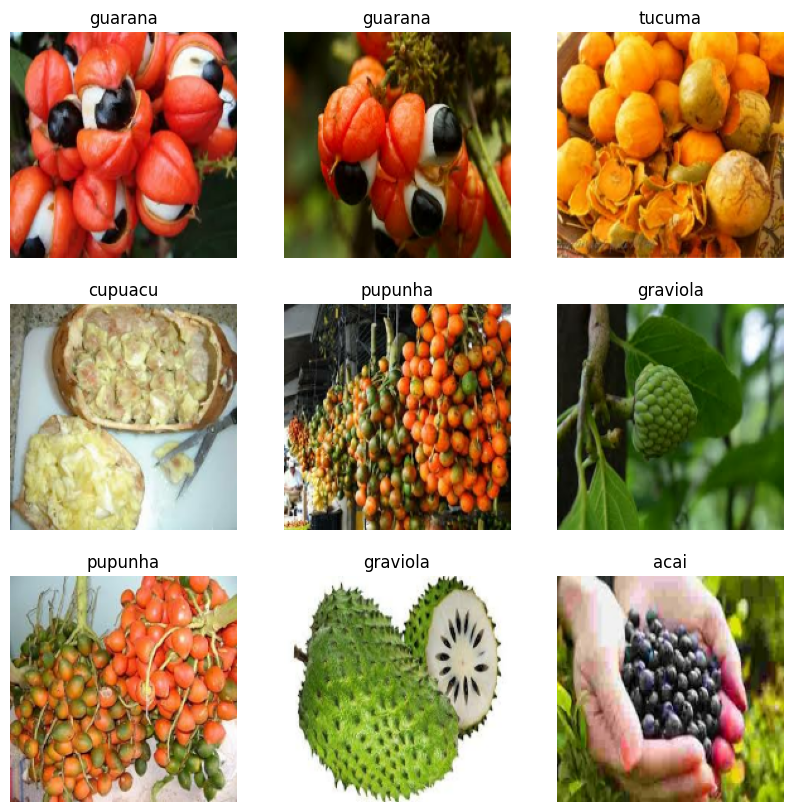

In [ ]:
import matplotlib.pyplot as plt

# Display the first batch from training dataset
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
    plt.show()


Model Architectute

Convolutional Architecture:
1.   Convolutional Layer [F=(3,3); k=32; P=same; s=1]
2.   Activation layer [ReLU]
3.   Pooling Layer [max,  F=(2,2), s=2]
4.   Convolutional Layer [F=(3,3); k=32; P=same; s=1]
5.   Activation layer [ReLU]
6.   Pooling Layer [max, F=(2,2), s=2]

Fully Connected Network Architecture:
1. Flatten the input coming from convolutional layer
2. Input Layer/Hidden layer [number of neurons --> 64]
3. Output Layer [number of neurons = num_classes]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def generate_model(input_shape, num_classes):
    """
    Generates a convolutional neural network (CNN) model.

    Parameters:
        input_shape (tuple): The shape of the input images (height, width, channels).
        num_classes (int): The number of classes for classification.

    Returns:
        tf.keras.Sequential: A CNN model configured according to the specified input shape and number of classes.
    """
    model = tf.keras.Sequential([
        layers.Rescaling(1./255, input_shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model



Model Summary and Computational Graph


In [ ]:
input_shape = (img_height, img_width, 3)
num_classes = len(train_ds.class_names)

In [ ]:
model = generate_model(input_shape, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,202,246 (50.36 MB)

 Trainable params: 13,202,246 (50.36 MB)

 Non-trainable params: 0 (0.00 B)

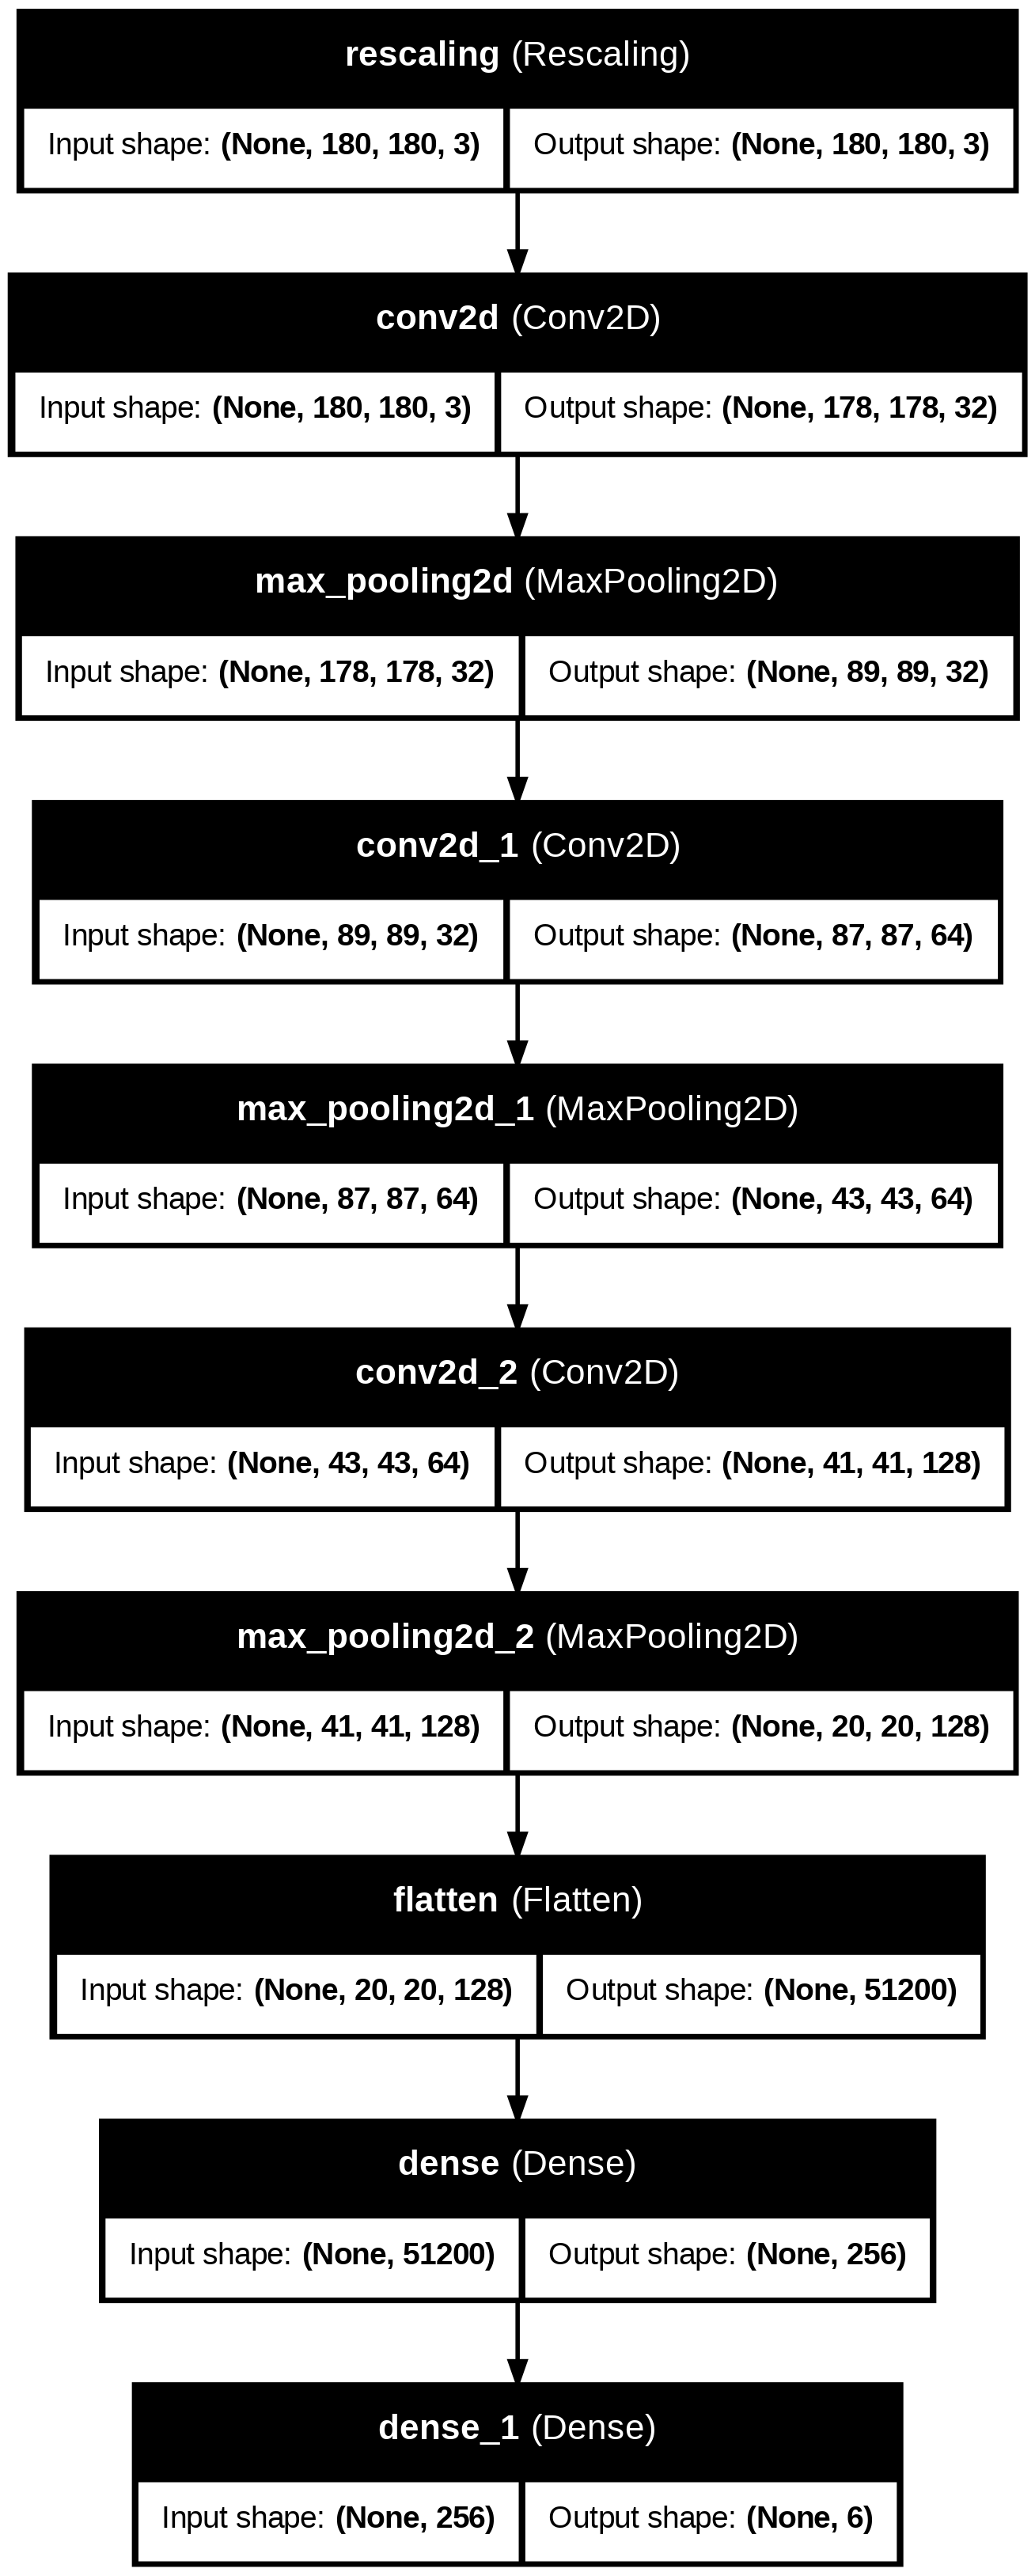

In [ ]:
# Plot model graph
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Assuming you have already defined your model and stored it in the variable 'model'

# Compile the model
model.compile(
    optimizer='adam',  # You can choose any optimizer like 'adam', 'sgd', etc.
    loss='sparse_categorical_crossentropy',  # Use appropriate loss function based on your task
    metrics=['accuracy']  # List of metrics to monitor during training
)

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,202,246 (50.36 MB)

 Trainable params: 13,202,246 (50.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1406 - loss: 3.5124 - val_accuracy: 0.1667 - val_loss: 1.7751
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2656 - loss: 2.1345 - val_accuracy: 0.1667 - val_loss: 1.7212
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.1793 - loss: 1.6818 - val_accuracy: 0.3333 - val_loss: 1.6783
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3672 - loss: 1.5397 - val_accuracy: 0.3333 - val_loss: 1.6018
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4861 - loss: 1.3662 - val_accuracy: 0.3333 - val_loss: 1.3908
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6910 - loss: 1.0225 - val_accuracy: 0.6667 - val_loss: 1.0002
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7747 - loss: 0.7529 - val_accuracy: 0.3333 - val_loss: 1.9953
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8620 - loss: 0.4777 - val_accuracy: 0.6667 - val_loss: 0.9213
Epoch 9/10
3/3 ━

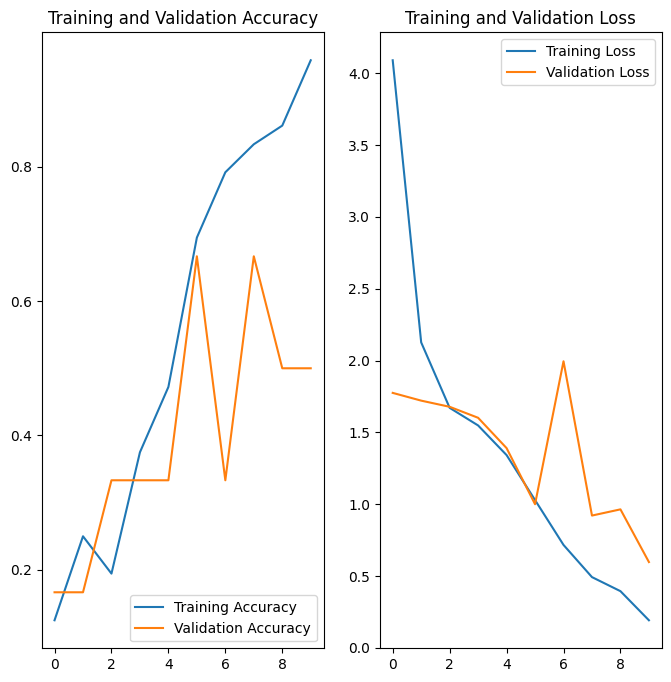

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Question:
Why do you think our model performed the way it performed?

What we can do to improve the model performance?

Evaluate the Model

In [ ]:
# Directory containing test images
test_dir = '/content/drive/MyDrive/AI&ML/FruitinAmazon/test'

# Create test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4667 - loss: 1.5827
Test Loss: 1.5827064514160156
Test Accuracy: 0.46666666865348816


Data Augmentation with ImageDataGenerator

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define parameters
img_width, img_height = 150, 150
batch_size = 32
train_dir =  '/content/drive/MyDrive/AI&ML/FruitinAmazon/train'
val_dir = '/content/drive/MyDrive/AI&ML/FruitinAmazon/test'

In [ ]:
# Data Augmentation with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=None  # Add your preprocessing function if needed
)
# For validation data, only rescaling is applied
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Generate batches of data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [ ]:
# Redesigning the Model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Assuming 6 classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=20, validation_data=validation_generator, validation_steps=len(validation_generator))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1888 - loss: 235.1891 - val_accuracy: 0.1667 - val_loss: 2.1136
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.2099 - loss: 153.0334 - val_accuracy: 0.1667 - val_loss: 1.7834
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2260 - loss: 14.4389 - val_accuracy: 0.1667 - val_loss: 1.7893
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.2231 - loss: 4.4013 - val_accuracy: 0.1333 - val_loss: 1.7898
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2283 - loss: 1.8958 - val_accuracy: 0.1667 - val_loss: 1.7911
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3012 - loss: 1.5929 - val_accuracy: 0.1667 - val_loss: 1.7913
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.2790 - loss: 1.6232 - val_accuracy: 0.1667 - val_loss: 1.7913
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3048 - loss: 1.5206 - val_accuracy: 0.1667 - val_loss: 1.7911
Epoch 9/2